## Introducción
El objetivo de este proyecto es analizar los datos de biodiversidad del servicio de parques nacionales. Al final del proyecto se deberán contestar las preguntas:


*   ¿Cuál es la distribución del estado de conservación de las especies?
*   ¿Hay ciertos tipos de especies que tienen más probabilidades de estar en peligro de extinción?
* ¿Son significativas las diferencias entre las especies y su estado de conservación?
* ¿Qué animal es el más frecuente y cuál es su distribución en los distintos parques?



## Importamos las librerías Python
Importamos las librerías que vamos a usar en el proyecto

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


## Cargamos los datos
Cargamos los datos de los dos ficheros

In [3]:
df_observations = pd.read_csv("observations.csv",encoding="utf-8")
df_species = pd.read_csv("species_info.csv",encoding="utf-8")

### Especies
Contiene información de las diferentes especies de los parques nacionales. Sus columnas son:


*   **category**: La categoría taxonómica de cada especie.
*   **scientific_name**: El nombre científico de cada especie.
* **common_names**: El nombre común de cada especie.
* **conservation_status**: El estado de conservación.

In [4]:
df_species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


### Observaciones
Contiene información del número de veces que se han observado las diferentes especies en los parques nacionales los últimos 7 días. Sus columnas son:


*   **scientific_name**: El nombre científico de cada especie.
* **park_name**: El nombre del parque.
* **observations**: El número de observaciones.

In [5]:
df_observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


### Características de los datos
Usamos la función .shape para averiguar el número de filas de cada tabla:



In [6]:
print(f"Especies: {df_species.shape[0]} filas")
print(f"Observaciones: {df_observations.shape[0]} filas")

Especies: 5824 filas
Observaciones: 23296 filas


## Exploramos los datos

### Especies
Vamos a comenzar valorando el número de categorías y especies distintas.

In [7]:
print(f"Categorías distintas: {df_species.category.nunique()}")
print(f"Especies distintas: {df_species.scientific_name.nunique()}")

Categorías distintas: 7
Especies distintas: 5541


Dado que hay un mayor número de filas que de especies distintas vamos a proceder a eliminar los duplicados para a continuación ver la distribución de las especies en las distintas categorías.

In [8]:
df_species = df_species.drop_duplicates("scientific_name")
df_species.groupby("category").size()

category
Amphibian              79
Bird                  488
Fish                  125
Mammal                176
Nonvascular Plant     333
Reptile                78
Vascular Plant       4262
dtype: int64

A continuación queremos saber cuántas especies están clasificadas en cada uno de los estados de conservación y vamos a agruparlas por categorías.
Los estados de conservación son:


*   "Species of Concern": En declive o que parecen requerir medidas de conservación.
*   "Threatened": Vulnerables a la extinción en un futuro cercano.
* "Endangreed": En serio riesgo de extinción.
* "In Recovery": Anteriormente en peligro de extinción pero actualmente no lo está.



In [9]:
df_species.fillna("No intervención", inplace=True)
df_species.groupby("conservation_status").size()

conservation_status
Endangered              15
In Recovery              3
No intervención       5363
Species of Concern     151
Threatened               9
dtype: int64

In [10]:
conservationCategory = df_species[df_species.conservation_status != "No intervención"].groupby(["category","conservation_status"])["scientific_name"].count().unstack()
conservationCategory

conservation_status,Endangered,In Recovery,Species of Concern,Threatened
category,,,,
Amphibian,1.0,NaN,4.0,2.0
Bird,4.0,3.0,68.0,NaN
Fish,3.0,NaN,4.0,3.0
Mammal,6.0,NaN,22.0,2.0
Nonvascular Plant,NaN,NaN,5.0,NaN
Reptile,NaN,NaN,5.0,NaN
Vascular Plant,1.0,NaN,43.0,2.0


Para terminar vamos a comparar los valores de los estados de conservación en las distintas categorías. Con ello habremos respondido la primera pregunta.

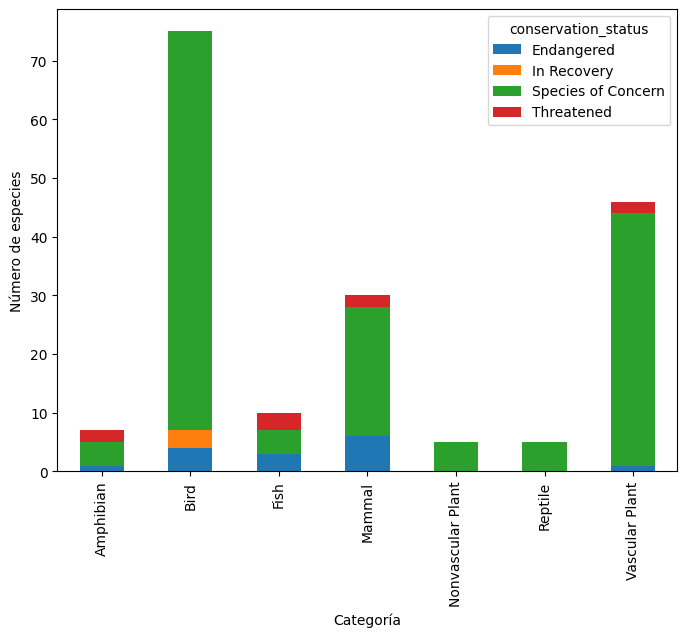

In [11]:
ax = conservationCategory.plot(kind = 'bar', figsize=(8,6),
                               stacked=True)
ax.set_xlabel("Categoría")
ax.set_ylabel("Número de especies");

### Observaciones
Vamos a ver cuáles son los parques estudiados y cuántas observaciones se han hecho en cada uno de ellos.

In [12]:
df_observations.groupby("park_name").observations.sum()

park_name
Bryce National Park                     576025
Great Smoky Mountains National Park     431820
Yellowstone National Park              1443562
Yosemite National Park                  863332
Name: observations, dtype: int64

## Análisis:
### Conservación de especies:
La segunda pregunta pretende averiguar si hay ciertos tipos de especies con más riesgo de conservación. Para ello vamos a crear una nueva columna dicotómica que indique si la especie presenta riesgo de conservación, sea cual sea, o no.
A continuación generamos una nueva tabla que muestre cuántas especies hay protegidas y no protegidas dentro de cada categoría y su valor relativo.

In [13]:
df_species["protegida"]= df_species.conservation_status != "No intervención"

category_counts = df_species.groupby(['category', 'protegida'])["scientific_name"].count().reset_index()\
                  .pivot(columns='protegida',index='category',values='scientific_name').reset_index()

category_counts.columns = ['Categoría', 'No protegidas', 'Protegidas']

category_counts["% protegidas"] = 100* category_counts["Protegidas"]/(category_counts["Protegidas"] + category_counts["No protegidas"])

category_counts

,Categoría,No protegidas,Protegidas,% protegidas
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,10,8.000000
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


Tal como se puede apreciar la categoría con un mayor porcentaje de especies protegidas son los mamíferos (17%), seguidos de los pájaros (15.3%), y las que tienen un menor número de especies protegidas son las plantas vasculares (1.07%) y no vasculares (1.5%).

Para responder a la tercera pregunta debemos confirmar que estas diferencias entre categorías son significativas. Para ello vamos a realizar la prueba de chi cuadrado entre las que tienen un mayor (mamíferos) y un menor porcentaje (plantas no vasculares).

In [14]:
from scipy.stats import chi2_contingency

contingency_Mammal_Nonvascular_Plant = [[30, 146],
                                        [5, 328]]
pvalue = chi2_contingency(contingency_Mammal_Nonvascular_Plant)[1]
pvalue

1.481868915759314e-10

Dado que el resultado es inferior a 0.05 se confirma que hay diferencias significativas entre el estado de conservación de las distintas categorías.

### Observación de animales
La cuarta pregunta es muy confusa, ya que no queda claro a qué se refiere exactamente con "animales". A pesar de que la propuesta de solución presentada por codecademy une varias especies bajo un mismo animal por el supuesto de que comparten parte del nombre común, he decidido enfocar la pregunta tomando cada especie como un único animal.

Para ello he agrupado las observaciones en función del nombre científico y posteriormente he buscado el valor máximo de las observaciones.

In [53]:
Observaciones_Especies = df_observations.groupby("scientific_name").observations.sum()
Maximo_Observaciones = df_observations.groupby("scientific_name").observations.sum().max()
Especie_Mas_Observada = Observaciones_Especies[Observaciones_Especies == Maximo_Observaciones]
print(Especie_Mas_Observada)
print("\n")

Categoria_Mas_Observada = df_species.category[df_species.scientific_name== "Streptopelia decaocto"]
Nombre_Comun_Mas_Observada = df_species.common_names[df_species.scientific_name== "Streptopelia decaocto"]
Conservation_Status_Mas_Observada = df_species.conservation_status[df_species.scientific_name== "Streptopelia decaocto"]

print(f"Categoría más observada: {Categoria_Mas_Observada.values}")
print(f"Nombre común más observado: {Nombre_Comun_Mas_Observada.values}")
print(f"Estado de conservación más observada: {Conservation_Status_Mas_Observada.values}\n")

df_observations[df_observations.scientific_name == "Streptopelia decaocto"].groupby("park_name").observations.sum()

scientific_name
Streptopelia decaocto    1785
Name: observations, dtype: int64


Categoría más observada: ['Bird']
Nombre común más observado: ['Eurasian Collared-Dove']
Estado de conservación más observada: ['No intervención']



park_name
Bryce National Park                    301
Great Smoky Mountains National Park    256
Yellowstone National Park              771
Yosemite National Park                 457
Name: observations, dtype: int64

Tal como se puede apreciar la especie más observada ha sido la tórtola turca, un pájaro que no está protegido y que ha sido visto en los cuatro parques en los últimos siete días, siendo el mayor número de observaciones el del parque Yellowstone.